In [ ]:
# this notebook outlines the data preparation and model building of a heart disease classifier
# the data set contains patient information regarding cardiovascular function and will train the classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing and ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# import data
df = pd.read_csv('heart_data.csv')

# map FastingBS into qualitative labels for dummy variable transformation later
df['FastingBS'] = df['FastingBS'].map({0:'Under120', 1:'Over120'})

# create object for scaling numeric values
sc_trans = StandardScaler()

# transform the numeric values in df
sc_array = sc_trans.fit_transform(df.loc[:,['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

# make a copy of original df; scaled values will go into copy 
sc_df = df.copy()

# insert the scaled values from sc_array into new scaled df (sc_df)
for i, col in enumerate(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']):
    sc_df[col] = sc_array[:, i].reshape(-1,1)
    
# split up data by gender and drop Sex column from df
df_male = sc_df.loc[sc_df['Sex'] == 'M']
df_male_dummy = pd.get_dummies(df_male).drop('Sex_M', axis=1)

df_female = sc_df.loc[sc_df['Sex'] == 'F']
df_female_dummy = pd.get_dummies(df_female).drop('Sex_F', axis=1)

# create X and y for male and female
X_male = df_male_dummy.drop('HeartDisease', axis=1)
y_male = df_male_dummy.loc[:, 'HeartDisease']

X_fem = df_female_dummy.drop('HeartDisease', axis=1)
y_fem = df_female_dummy.loc[:, 'HeartDisease']

# train test split for males
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_male, y_male,
                                                           test_size=0.2,
                                                           random_state=42,
                                                           stratify=y_male)

# # train test split for femalaes
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fem, y_fem,
                                                           test_size=0.2,
                                                           random_state=42,
                                                           stratify=y_fem)

# make logistic regression objects
male_log_reg = LogisticRegression(solver='liblinear').fit(X_train_m, y_train_m)
fem_log_reg = LogisticRegression(solver='liblinear').fit(X_train_f, y_train_f)

In [3]:
# check results for male predictor
male_log_reg.score(X_test_m, y_test_m)

0.8896551724137931

In [4]:
# for male results confusion matrix
confusion_matrix(y_test_m, male_log_reg.predict(X_test_m))

array([[45,  8],
       [ 8, 84]], dtype=int64)

In [5]:
# male results classification report
classification_report(y_test_m, male_log_reg.predict(X_test_m))

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85        53\n           1       0.91      0.91      0.91        92\n\n    accuracy                           0.89       145\n   macro avg       0.88      0.88      0.88       145\nweighted avg       0.89      0.89      0.89       145\n'

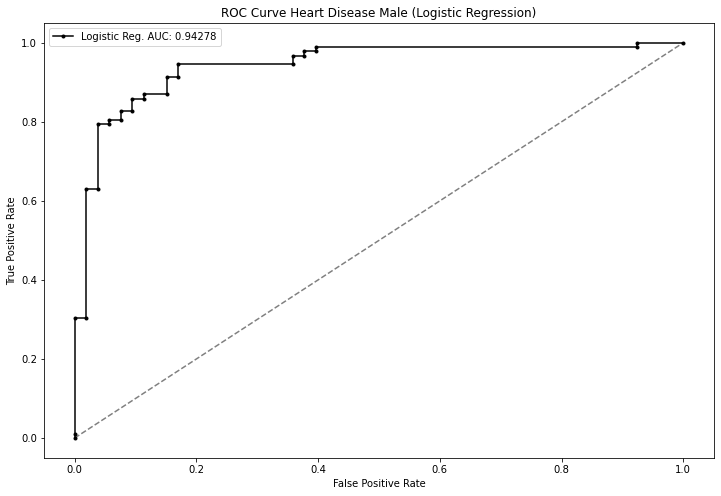

In [6]:
# making ROC curve for male
male_prob = male_log_reg.predict_proba(X_test_m)
male_prob_col = male_prob[:,1]

ns_fpr_m, ns_tpr_m, _ = roc_curve(y_test_m, [0 for _ in range(len(y_test_m))])
lr_fpr_m, lr_tpr_m, _ = roc_curve(y_test_m, male_prob_col)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ns_fpr_m, ns_tpr_m, linestyle='dashed', color='grey')
ax.plot(lr_fpr_m, lr_tpr_m, marker='.', label='Logistic Reg. AUC: ' + str(round(roc_auc_score(y_test_m, male_log_reg.predict_proba(X_test_m)[:,1]), 5)), color='black')
ax.set_title('ROC Curve Heart Disease Male (Logistic Regression)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()

In [7]:
# AUC score for male 
str(round(roc_auc_score(y_test_m, male_log_reg.predict_proba(X_test_m)[:,1]), 5))

'0.94278'

In [8]:
# check results for female predictor
fem_log_reg.score(X_test_f, y_test_f)

0.9230769230769231

In [9]:
# female results confusion matrix
confusion_matrix(y_test_f, fem_log_reg.predict(X_test_f))

array([[27,  2],
       [ 1,  9]], dtype=int64)

In [10]:
# female results classification report
classification_report(y_test_f, fem_log_reg.predict(X_test_f))

'              precision    recall  f1-score   support\n\n           0       0.96      0.93      0.95        29\n           1       0.82      0.90      0.86        10\n\n    accuracy                           0.92        39\n   macro avg       0.89      0.92      0.90        39\nweighted avg       0.93      0.92      0.92        39\n'

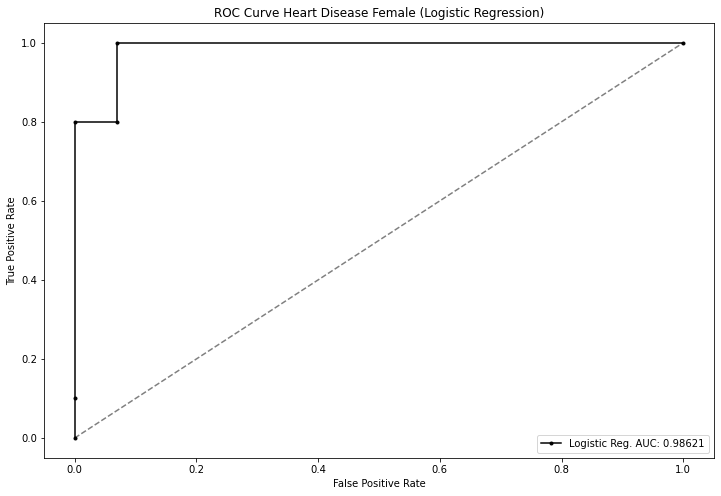

In [11]:
# making ROC curve for female
fem_prob = fem_log_reg.predict_proba(X_test_f)
fem_prob_col = fem_prob[:,1]

ns_fpr_f, ns_tpr_f, _ = roc_curve(y_test_f, [0 for _ in range(len(y_test_f))])
lr_fpr_f, lr_tpr_f, _ = roc_curve(y_test_f, fem_prob_col)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ns_fpr_f, ns_tpr_f, linestyle='dashed', color='grey')
ax.plot(lr_fpr_f, lr_tpr_f, marker='.', label='Logistic Reg. AUC: ' + str(round(roc_auc_score(y_test_f, fem_log_reg.predict_proba(X_test_f)[:,1]), 5)), color='black')
ax.set_title('ROC Curve Heart Disease Female (Logistic Regression)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()

In [12]:
# AUC score female
str(round(roc_auc_score(y_test_f, fem_log_reg.predict_proba(X_test_f)[:,1]), 5))

'0.98621'

In [13]:
# various parameters of this experiment following

In [14]:
X_fem.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_Over120,FastingBS_Under120,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,0,1,0,0,1,0,1,0,1,0,0,1,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,0,0,0,0,1,0,1,0,0,1,0,1,0
6,-0.902775,-0.129513,0.349422,1.304332,-0.832432,0,1,0,0,0,1,0,1,0,1,0,0,0,1
9,-0.584556,-0.669935,0.779335,-0.660578,-0.832432,0,1,0,0,0,1,0,1,0,1,0,0,0,1
10,-1.751359,-0.129513,0.111598,0.203982,-0.832432,0,0,1,0,0,1,0,1,0,1,0,0,0,1


In [15]:
y_fem.head()

1     1
3     1
6     0
9     0
10    0
Name: HeartDisease, dtype: int64

In [16]:
pd.DataFrame(y_fem).head()

,HeartDisease
1,1
3,1
6,0
9,0
10,0


In [17]:
X_fem.shape

(193, 19)

In [18]:
fem_log_reg.intercept_

array([-0.12250026])

In [19]:
fem_log_reg.coef_

array([[ 0.32171226,  0.43383653, -0.44885086,  0.15843699,  0.24400937,
         0.75526081, -0.36180891, -0.12169995, -0.39425221,  0.75825691,
        -0.88075717, -0.03646036,  0.03901627, -0.12505617, -0.51069968,
         0.38819942,  0.57569395,  0.68302224, -1.38121644]])

In [20]:
male_log_reg.intercept_

array([0.14921988])

In [21]:
male_log_reg.coef_

array([[ 0.06871555, -0.00994376, -0.45721579, -0.16426663,  0.56906635,
         1.17936002, -0.52799855, -0.36555466, -0.13658694,  0.54070543,
        -0.39148555,  0.13845299, -0.10641562,  0.1171825 , -0.29182604,
         0.44104592, -0.19378576,  1.26235109, -0.91934545]])

In [22]:
X_train_m.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'FastingBS_Over120', 'FastingBS_Under120',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [23]:
pd.DataFrame({'Male': male_log_reg.coef_.reshape(-1), 'Female': fem_log_reg.coef_.reshape(-1)}, index=X_train_m.columns)

,Male,Female
Age,0.068716,0.321712
RestingBP,-0.009944,0.433837
Cholesterol,-0.457216,-0.448851
MaxHR,-0.164267,0.158437
Oldpeak,0.569066,0.244009
ChestPainType_ASY,1.179360,0.755261
ChestPainType_ATA,-0.527999,-0.361809
ChestPainType_NAP,-0.365555,-0.121700
ChestPainType_TA,-0.136587,-0.394252
FastingBS_Over120,0.540705,0.758257
